<a href="https://colab.research.google.com/github/yasmine-juarez/capstone/blob/Zachary/Middle_east_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


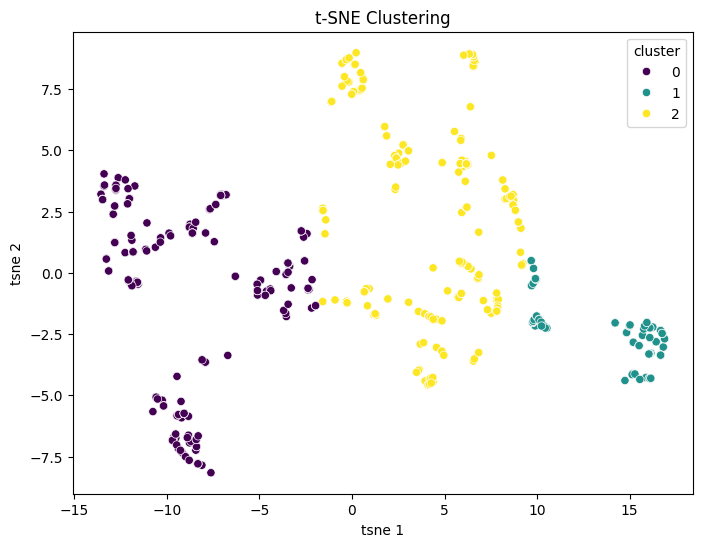

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random

random.seed(20)
# 1. Filter data for MENA
mena_df = pd.read_csv("mena_data.csv", low_memory=False)
mena_df = mena_df.reset_index(drop=True)

# top_global = ['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index', 'v2x_accountability', 'v2x_partipdem', 'v2x_clpol', 'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem', 'v2x_freexp_altinf', 'v2x_diagacc', 'v2caassemb', 'v2psoppaut']
# 2. Prepare the data top regional
features = ['v2edtehire','v2x_jucon', 'v2cacritic', 'v2xnp_pres', 'v2lgotovst', 'v2elmulpar']
X_mena = mena_df[features]
mena_df.dropna(subset=features, inplace=True)
# Then prepare X_mena and proceed
X_mena = mena_df[features]

# 3. Scale the data (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_mena)

# Feature Selection and Scaling for MENA
scaler = StandardScaler()
X_scaled_MENA = scaler.fit_transform(X_mena)

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=100, learning_rate=50, n_iter=1500, init = 'pca')
X_tsne_mena = tsne.fit_transform(X_mena)

# K-Means clustering on t-SNE results
kmeans = KMeans(n_clusters=3, random_state=7)  # Adjust n_clusters if needed
clusters_mena = kmeans.fit_predict(X_tsne_mena)

# Adding cluster labels and t-SNE dimensions to mena_df
mena_df['cluster'] = clusters_mena
mena_df['tsne 1'] = X_tsne_mena[:, 0]
mena_df['tsne 2'] = X_tsne_mena[:, 1]

# Visualization (optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=mena_df, palette='viridis')
plt.title('t-SNE Clustering')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


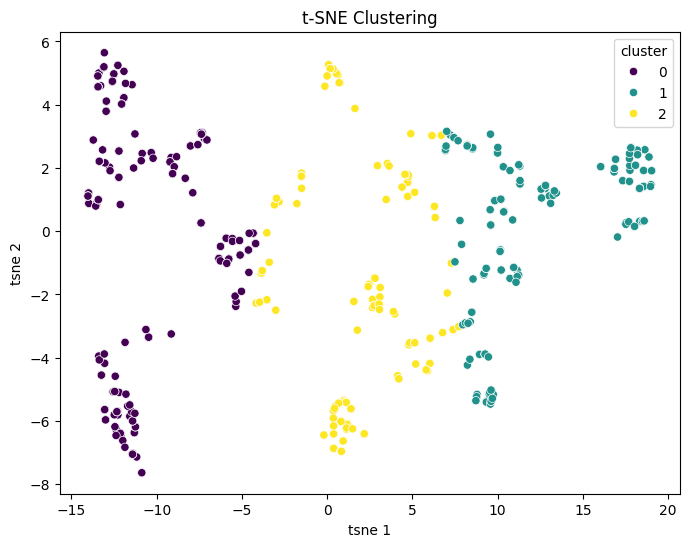

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE
# from sklearn.metrics import silhouette_score
# from scipy.spatial.distance import cdist
# from google.colab import drive
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import random

# random.seed(20)
# # 1. Filter data for MENA
# mena_df = pd.read_csv("mena_data.csv", low_memory=False)
# mena_df = mena_df.reset_index(drop=True)

# # top_global = ['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index', 'v2x_accountability', 'v2x_partipdem', 'v2x_clpol', 'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem', 'v2x_freexp_altinf', 'v2x_diagacc', 'v2caassemb', 'v2psoppaut']
# # 2. Prepare the data top regional
# features = ['v2edtehire','v2elmulpar', 'v2cacritic', 'v2lgotovst']
# X_mena = mena_df[features]
# mena_df.dropna(subset=features, inplace=True)
# # Then prepare X_mena and proceed
# X_mena = mena_df[features]

# # 3. Scale the data (if necessary)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_mena)

# # Feature Selection and Scaling for MENA
# scaler = StandardScaler()
# X_scaled_MENA = scaler.fit_transform(X_mena)

# # t-SNE for dimensionality reduction
# tsne = TSNE(n_components=2, perplexity=100, learning_rate=50, n_iter=1500, init = 'pca')
# X_tsne_mena = tsne.fit_transform(X_mena)

# # K-Means clustering on t-SNE results
# kmeans = KMeans(n_clusters=3, random_state=7)  # Adjust n_clusters if needed
# clusters_mena = kmeans.fit_predict(X_tsne_mena)

# # Adding cluster labels and t-SNE dimensions to mena_df
# mena_df['cluster'] = clusters_mena
# mena_df['tsne 1'] = X_tsne_mena[:, 0]
# mena_df['tsne 2'] = X_tsne_mena[:, 1]

# # Visualization (optional)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=mena_df, palette='viridis')
# plt.title('t-SNE Clustering')
# plt.show()

[[-8.65115   -0.8216859]
 [14.229329  -2.489954 ]
 [ 4.306023   2.4159217]]


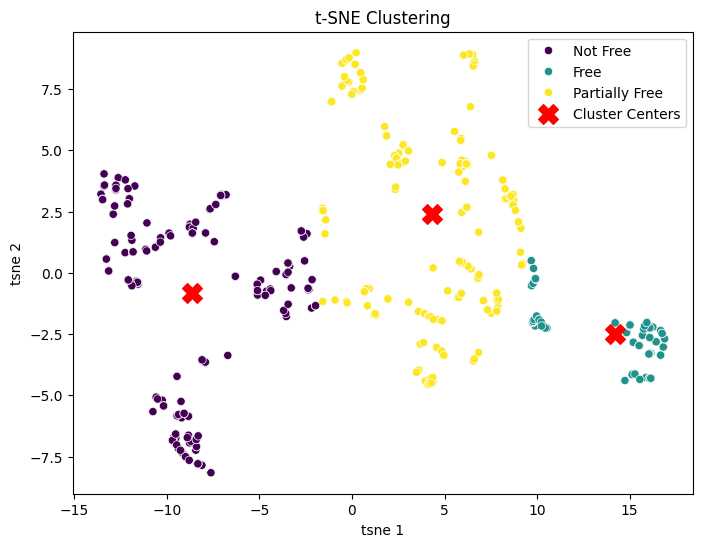

In [ ]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Print cluster centers
print(cluster_centers)

# Visualization with cluster centers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=mena_df, palette='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

# Create a custom legend with desired labels
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing handles and labels
legend_labels = ['Not Free', 'Free', 'Partially Free', 'Cluster Centers']  # Define new labels
plt.legend(handles, legend_labels)  # Apply new labels

plt.title('t-SNE Clustering')
plt.show()

In [ ]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate distances between data points and cluster centers
distances = cdist(X_tsne_mena, cluster_centers)

# Find the index of the closest data point to each cluster center
closest_data_point_indices = np.argmin(distances, axis=0)

# Create a dictionary to store cluster-country mapping
cluster_country_mapping = {}

# Iterate through cluster centers and corresponding countries
for cluster_num, country_index in enumerate(closest_data_point_indices):
    # Get the country name from the original DataFrame
    country_name = mena_df.iloc[country_index]['country_name']
    # Store the mapping in the dictionary
    cluster_country_mapping[cluster_num] = country_name

# Print the cluster-country mapping
for cluster_num, country_name in cluster_country_mapping.items():
    print(f"Cluster {cluster_num}: {country_name}")

Cluster 0: Iran
Cluster 1: Israel
Cluster 2: Morocco


In [ ]:
for i, center in enumerate(kmeans.cluster_centers_):
    idx = np.argmin(np.linalg.norm(X_tsne_mena - center, axis=1))
    country = mena_df.iloc[idx]['country_name']
    year = mena_df.iloc[idx]['year']
    status = mena_df.iloc[idx]['pred_status']
    print(f"Cluster {i}: Country: {country}, Year: {year}, Status: {status}")

Cluster 0: Country: Iran, Year: 1978, Status: 3.0
Cluster 1: Country: Israel, Year: 1963, Status: 1.0
Cluster 2: Country: Morocco, Year: 1990, Status: 2.0


In [ ]:
# random.seed(7)
# # 1. Filter data for MENA
# mena_df = pd.read_csv("mena_data.csv", low_memory=False)
# mena_df = mena_df.reset_index(drop=True)

# # 2. Prepare the data top regional
# features = ['v2x_libdem', 'v2x_polyarchy', 'v2x_egaldem', 'v2x_mpi', 'v2x_delibdem', 'v2x_EDcomp_thick', 'v2x_partipdem', 'v2x_api', 'v2x_veracc', 'v2elfrfair', 'e_lexical_index','v2x_liberal', 'v2psoppaut', 'v2x_accountability', 'v2x_regime','v2edtehire', 'v2elmulpar','v2cacritic']
# X_mena = mena_df[features]
# mena_df.dropna(subset=features, inplace=True)
# # Then prepare X_mena and proceed
# X_mena = mena_df[features]

# # 3. Scale the data (if necessary)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_mena)

# # Feature Selection and Scaling for MENA
# scaler = StandardScaler()
# X_scaled_MENA = scaler.fit_transform(X_mena)

# # t-SNE for dimensionality reduction
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne_mena = tsne.fit_transform(X_mena)

# # K-Means clustering on t-SNE results
# kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters if needed
# clusters_mena = kmeans.fit_predict(X_tsne_mena)

# # Adding cluster labels and t-SNE dimensions to mena_df
# mena_df['cluster'] = clusters_mena
# mena_df['tsne 1'] = X_tsne_mena[:, 0]
# mena_df['tsne 2'] = X_tsne_mena[:, 1]

# # Visualization (optional)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=mena_df, palette='viridis')
# plt.title('t-SNE Clustering')
# plt.show()

In [ ]:
mena_df[]